In [1]:
from tensorflow import keras
from keras.applications import VGG16
import numpy as np

In [2]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

In [3]:
from keras.datasets import cifar10
(train_data,train_label),(test_data,test_label) = cifar10.load_data()

In [4]:
train_data.shape

(50000, 32, 32, 3)

In [5]:
train_data = train_data/255.0
test_data = test_data/255.0

In [6]:
from keras.utils import to_categorical
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [7]:
train_label[0].shape

(10,)

In [8]:
labels = {0: 'Airplane',
1: 'Automobile',
2 : 'Bird',
3 : 'Cat',
4 : 'Deer',
5 : 'Dog',
6 : 'Frog',
7 : 'Horse',
8 : 'Ship',
9 : 'Truck'
}

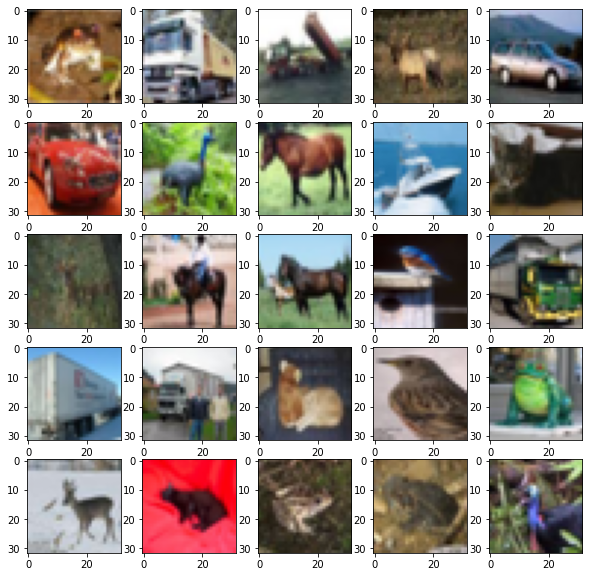

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_data[i])
    #plt.xlabel(labels.get(train_label[i]))

In [10]:
model_transfer = keras.Sequential()
model_transfer.add(base_model)
model_transfer.add(keras.layers.Flatten())
model_transfer.add(keras.layers.Dense(128, activation='relu'))
model_transfer.add(keras.layers.Dropout(0.5))
model_transfer.add(keras.layers.Dense(10,activation='softmax'))
model_transfer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 14,781,642
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model_transfer.fit(train_data,train_label,epochs=10,validation_split=0.2)

Epoch 1/10
 596/1250 [=============>................] - ETA: 31:18 - loss: 2.1760 - accuracy: 0.1531

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Kunal Sharma\AppData\Local\Temp/ipykernel_30132/3947208450.py", line 1, in <module>
    history = model_transfer.fit(train_data,train_label,epochs=10,validation_split=0.2)
  File "c:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "c:\Python310\lib\site-packages\keras\engine\training.py", line 1650, in fit
    tmp_logs = self.train_function(iterator)
  File "c:\Python310\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "c:\Python310\lib\site-packages\tensorflow\python\eager\polymorphic_function\polymorphic_function.py", line 880, in __call__
    result = self._call(*args, **kwds)
  File "c:\Python310\lib\site-packages\tensorflow\pytho